In [1]:
from sklearn import preprocessing
from sklearn.externals import joblib
import sklearn as skl
from sklearn import tree
from collections import defaultdict
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import accuracy_score
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report 
%matplotlib inline
import time
import warnings
# 5-class classification version
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, zero_one_loss, accuracy_score
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)

C:\Users\rodelga\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
data_root_dir = r'D:\CIC\Train and Test\Filter 40 - DT'
# Load all the training and testing data
X_train = pd.read_pickle(f'{data_root_dir}\X_train.pkl')
X_test = pd.read_pickle(f'{data_root_dir}\X_test.pkl')
y_test = pd.read_pickle(f'{data_root_dir}\y_test.pkl')
y_train = pd.read_pickle(f'{data_root_dir}\y_train.pkl')

In [3]:
# Timer to see how long it takes to test the algorithm
startTime = time.perf_counter()

dt_classifier = DecisionTreeClassifier(random_state=10)
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)

dt_results = confusion_matrix(y_test, y_pred_dt)
dt_error = zero_one_loss(y_test, y_pred_dt)
dt_score = accuracy_score(y_test, y_pred_dt) * 100
dt_report = classification_report(y_test, y_pred_dt)

# Print endTime - startTime to calculate how long it takes
endTime = time.perf_counter()

In [4]:
print(f"Total time: {endTime - startTime:0.4f} seconds \n")
print("Decision Tree Classifier Results")
print("=================================================")
print(f"Confusion Matrix:")
print(f"{dt_results[0]}")
print(f"{dt_results[1]} \n")

print("Report :")
print(dt_report) 

print(f"True Postive   : {dt_results[0][0]}")
print(f"False Positive : {dt_results[0][1]}")
print(f"False Negative : {dt_results[1][0]}")
print(f"True Negative  : {dt_results[1][1]}")
print(f"Error Value    : {dt_error}")
print(f"Accuracy_Score : {dt_score}")
print("=================================================")

Total time: 1575.2179 seconds 

Decision Tree Classifier Results
Confusion Matrix:
[3986868   29802]
[ 42712 781791] 

Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   4016670
           1       0.96      0.95      0.96    824503

    accuracy                           0.99   4841173
   macro avg       0.98      0.97      0.97   4841173
weighted avg       0.98      0.99      0.98   4841173

True Postive   : 3986868
False Positive : 29802
False Negative : 42712
True Negative  : 781791
Error Value    : 0.014978601260479674
Accuracy_Score : 98.50213987395203


In [5]:
feature_importances = pd.Series(dt_classifier.feature_importances_, index=X_test.columns)
print('Feature importances sorted:')
print('---------------------------------')
feature_importances.nlargest(50)

Feature importances sorted:
---------------------------------


Dst Port             0.298448
TotLen Fwd Pkts      0.204610
Fwd Seg Size Min     0.100716
Flow Duration        0.089007
Init Fwd Win Byts    0.066427
Bwd Seg Size Avg     0.052141
Fwd IAT Tot          0.046124
Fwd Pkts/s           0.036816
Fwd IAT Std          0.028316
Flow IAT Min         0.012681
Fwd IAT Min          0.011286
Bwd Pkt Len Mean     0.007927
Fwd IAT Mean         0.004597
Flow IAT Mean        0.003562
Flow IAT Std         0.003518
Flow Byts/s          0.003289
Bwd Pkt Len Max      0.003229
Fwd Header Len       0.002897
Bwd Pkts/s           0.002784
Flow IAT Max         0.002301
URG Flag Cnt         0.001861
Fwd Act Data Pkts    0.001730
Flow Pkts/s          0.001633
Fwd IAT Max          0.001385
Bwd IAT Min          0.001197
Init Bwd Win Byts    0.001145
Fwd Pkt Len Max      0.001127
PSH Flag Cnt         0.001126
Fwd Pkt Len Mean     0.001039
Bwd IAT Std          0.000981
Bwd IAT Max          0.000950
ACK Flag Cnt         0.000909
Bwd IAT Tot          0.000894
Bwd IAT Me

Top 20 features:
---------------------------------
Dst Port             0.298448
TotLen Fwd Pkts      0.204610
Fwd Seg Size Min     0.100716
Flow Duration        0.089007
Init Fwd Win Byts    0.066427
Bwd Seg Size Avg     0.052141
Fwd IAT Tot          0.046124
Fwd Pkts/s           0.036816
Fwd IAT Std          0.028316
Flow IAT Min         0.012681
Fwd IAT Min          0.011286
Bwd Pkt Len Mean     0.007927
Fwd IAT Mean         0.004597
Flow IAT Mean        0.003562
Flow IAT Std         0.003518
Flow Byts/s          0.003289
Bwd Pkt Len Max      0.003229
Fwd Header Len       0.002897
Bwd Pkts/s           0.002784
Flow IAT Max         0.002301
dtype: float64


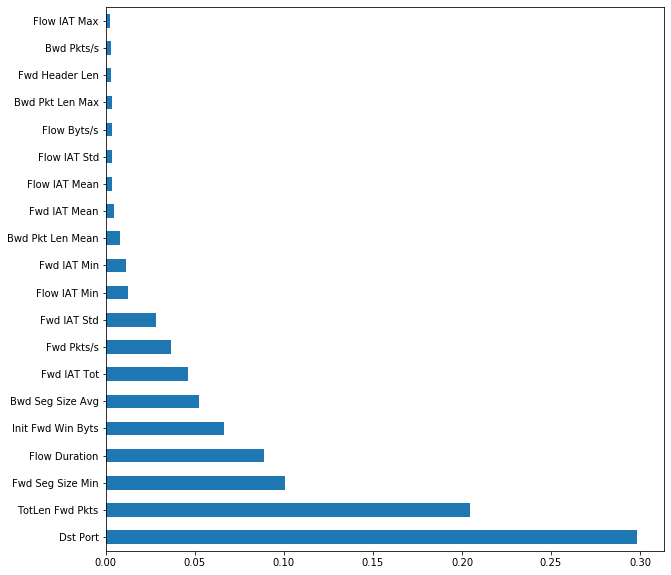

In [6]:
print('Top 20 features:')
print('---------------------------------')
feature_importances.nlargest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nlargest(20))

Least 20 features:
---------------------------------
Subflow Fwd Pkts     0.000111
Idle Max             0.000324
Bwd Header Len       0.000394
Idle Mean            0.000559
Idle Min             0.000561
FIN Flag Cnt         0.000594
Bwd IAT Mean         0.000806
Bwd IAT Tot          0.000894
ACK Flag Cnt         0.000909
Bwd IAT Max          0.000950
Bwd IAT Std          0.000981
Fwd Pkt Len Mean     0.001039
PSH Flag Cnt         0.001126
Fwd Pkt Len Max      0.001127
Init Bwd Win Byts    0.001145
Bwd IAT Min          0.001197
Fwd IAT Max          0.001385
Flow Pkts/s          0.001633
Fwd Act Data Pkts    0.001730
URG Flag Cnt         0.001861
dtype: float64


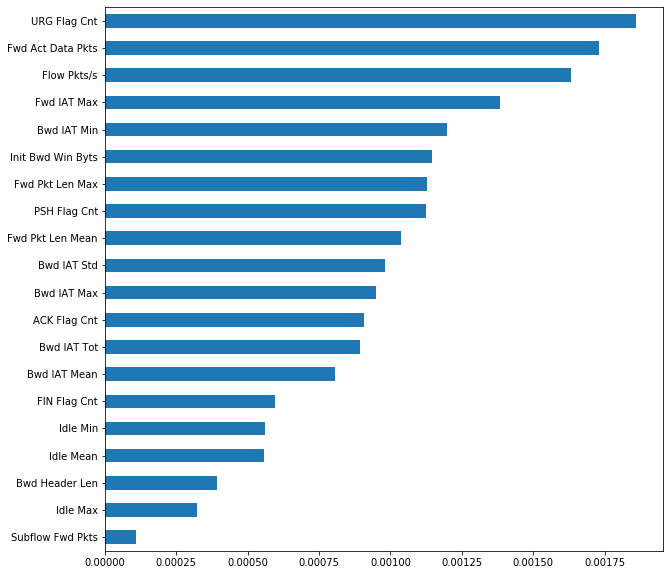

In [7]:
print('Least 20 features:')
print('---------------------------------')
feature_importances.nsmallest(20).plot(kind='barh', figsize=(10,10))
print(feature_importances.nsmallest(20))

# 